In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv("heart_disease1.csv")  # update path if needed
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [6]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
data = df.copy()

categorical_cols = [
    'sex', 'cp', 'fbs', 'restecg',
    'exang', 'slope', 'thal'
]

le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])


In [8]:
X = data.drop('num', axis=1)
y = data['num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Accuracy (Before Tuning):", accuracy_score(y_test, y_pred))
print("\nClassification Report (Before Tuning):\n")
print(classification_report(y_test, y_pred))


Accuracy (Before Tuning): 0.46703296703296704

Classification Report (Before Tuning):

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        80
           1       0.39      0.34      0.36        53
           2       0.14      0.18      0.16        22
           3       0.24      0.29      0.26        21
           4       0.00      0.00      0.00         6

    accuracy                           0.47       182
   macro avg       0.30      0.30      0.30       182
weighted avg       0.49      0.47      0.48       182



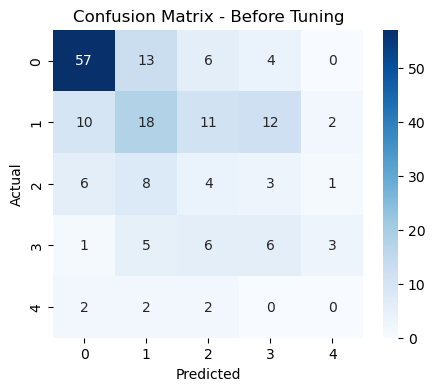

In [10]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Before Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [12]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:")
print(grid_search.best_params_)


Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [14]:
best_model = grid_search.best_estimator_

y_pred_tuned = best_model.predict(X_test)

print("Accuracy (After Tuning):", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report (After Tuning):\n")
print(classification_report(y_test, y_pred_tuned))


Accuracy (After Tuning): 0.5

Classification Report (After Tuning):

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        80
           1       0.36      0.53      0.43        53
           2       0.10      0.05      0.06        22
           3       0.21      0.14      0.17        21
           4       0.00      0.00      0.00         6

    accuracy                           0.50       182
   macro avg       0.28      0.29      0.28       182
weighted avg       0.47      0.50      0.48       182



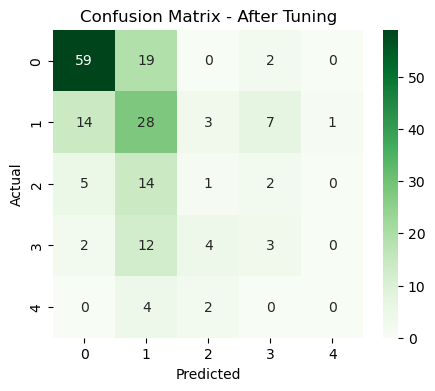

In [15]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned),
            annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - After Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
comparison_df = pd.DataFrame({
    'Model': ['Before Tuning', 'After Tuning'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_tuned)
    ]
})

comparison_df


,Model,Accuracy
0,Before Tuning,0.467033
1,After Tuning,0.500000


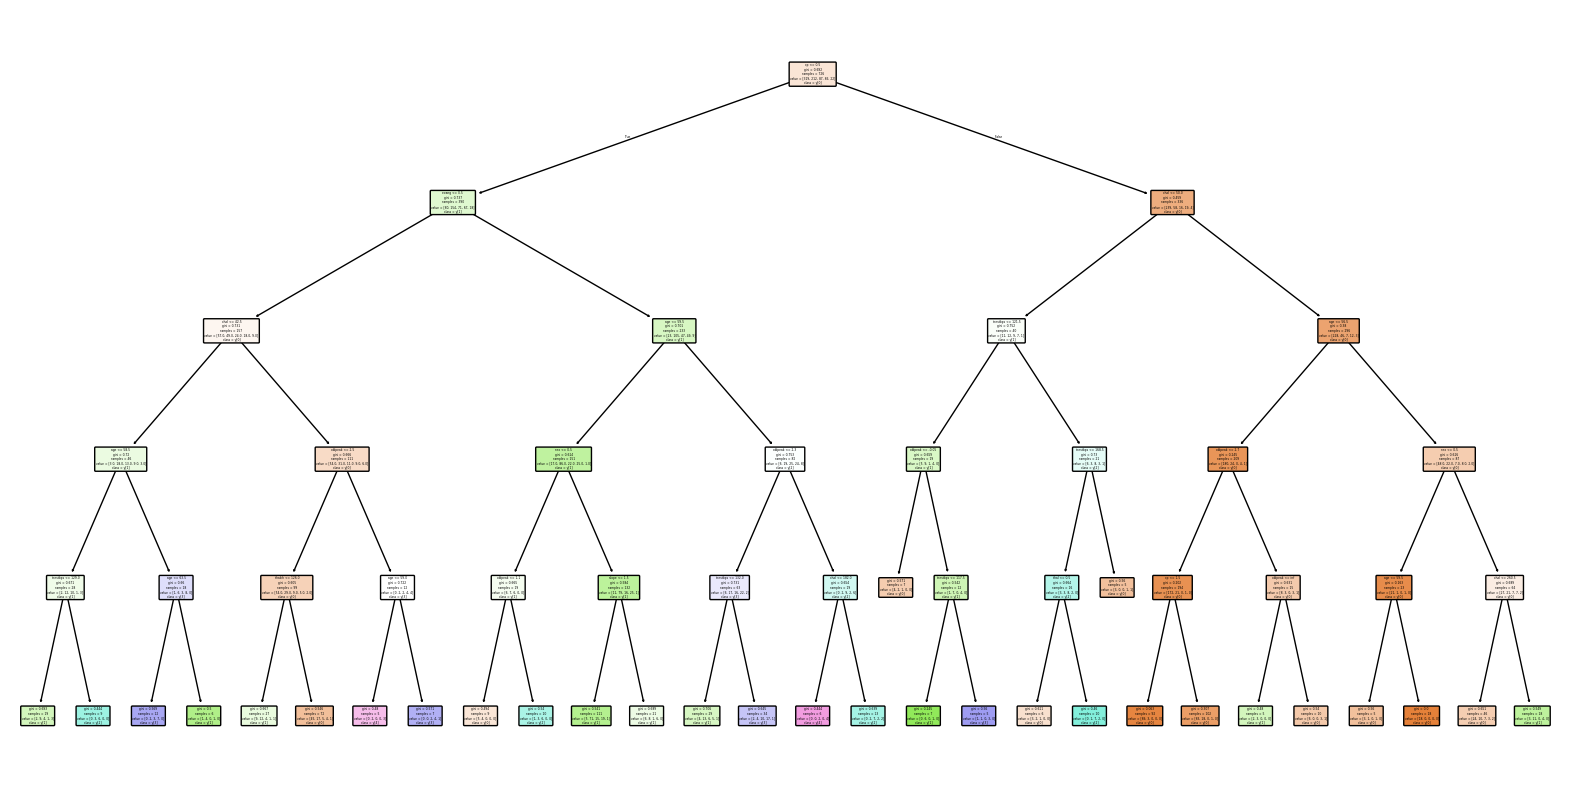

In [17]:
plt.figure(figsize=(20,10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=True,
    filled=True,
    rounded=True
)
plt.show()


In [18]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
2,cp,0.378145
4,chol,0.148946
0,age,0.145490
9,oldpeak,0.104896
3,trestbps,0.068051
8,exang,0.056676
1,sex,0.052353
7,thalch,0.015930
10,slope,0.015399
11,thal,0.014115


# INTERVIEW QUESTIONS

### 1. Common hyperparameters of Decision Tree models & their impact:
max_depth: Limits tree depth; prevents overfitting.

min_samples_split: Minimum samples to split a node; higher value = less complex tree.

min_samples_leaf: Minimum samples in a leaf node; smoothens model.

max_features: Limits number of features considered; adds randomness.

criterion (e.g., gini, entropy): Measures node impurity.

Effect: These control model complexity, overfitting, and accuracy.

### 2. Difference between Label Encoding and One-Hot Encoding:
Label Encoding: Converts categories into numbers (e.g., red=0, blue=1).

Use case: Ordinal data (where order matters).

Issue: Adds false order if used on nominal data.

One-Hot Encoding: Creates binary columns for each category.

Use case: Nominal data (no order).

Issue: Increases dimensionality.

